# Thuật toán 1


-128.0
128.0
-168.0
168.0
minx -126.58633801635779
maxx 104.33701732507981
miny -152.39266132608077
maxy 151.44000695373182
P 2
Lượt chạy: 1
Pd [[ 104.33701733  151.44000695]
 [-126.58633802  151.44000695]
 [-126.58633802 -152.39266133]
 [ 104.33701733 -152.39266133]]
pdoubt [104.33701733 151.44000695]
pdoubt_minus [ 104.33701733 -152.39266133]
pdoubt_plus [-126.58633802  151.44000695]
dp:  [0.7961489  0.60510075]
do lon dp:  0.9999999999999999
βdp 105.72627422788173
dp*pdoubt_plus:  -9.14511208853257
dp*(pdoubt.T):  174.7042643375254
Hieu:  68.97799010964366
Trường hợp 2
p_hat_minus [104.33701733  37.4457841 ]
p_hat_plus [ 17.69745819 151.44000695]
P: [[ 104.33701733   37.4457841 ]
 [  17.69745819  151.44000695]
 [-126.58633802  151.44000695]
 [-126.58633802 -152.39266133]
 [ 104.33701733 -152.39266133]]
Pdoubt:  [[ 104.33701733   37.4457841 ]
 [  17.69745819  151.44000695]
 [-126.58633802  151.44000695]
 [-126.58633802 -152.39266133]
 [ 104.33701733 -152.39266133]]
Ptest:  [[ 104.337

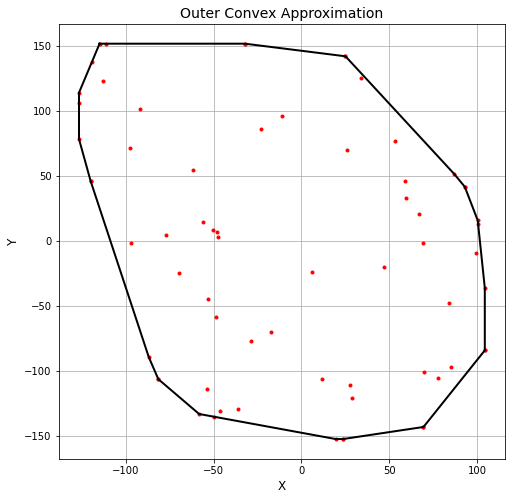

In [48]:
#import các thư viện cần thiết
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(42)

#Khởi tạo 
N_square = 10000

k=16
count1 = 0
count2 = 0
count3 = 0
count4 = 0

def outer_convex_approximation(X, δ):
    #Rotation angle
    alpha = -math.pi/2

    #Rotation Matrix
    R = np.array([[math.cos(alpha), math.sin(alpha)],[-math.sin(alpha), math.cos(alpha)]])
#     print("Tập X: ", X)
    # Step I: Determine D, βd, and P
    D = [(1, 0), (0, 1), (-1, 0), (0, -1)] #khởi tạo D theo công thức (7)
#     βd = [np.max(np.dot(X, d)) for d in D] #khởi tạo βd theo công thức (6)
    #công thức (8)
    min_x = np.min((X[:, 0]))
    max_x = np.max(X[:, 0])
    min_y = np.min((X[:, 1]))
    max_y = np.max(X[:, 1])
    
    print("minx", min_x)
    print("maxx", max_x)
    print("miny", min_y)
    print("maxy", max_y)
    
    #các giá trị r1, r2, r3, r4 đặt theo công thức (10)
    r1 = (max_x, max_y)
    r2 = (min_x, max_y)
    r3 = (min_x, min_y)
    r4 = (max_x, min_y)
    
#     print(r1, r2, r3, r4)
    
    P = np.array([r1, r2, r3, r4]) #Khởi tạo P theo công thức (9)
    print("P", P.ndim)

    #STEP II: gán Pdoubt = P
    Pdoubt = P[:]
    Ptest = P[:]
    global count4, count1, count2, count3
    # Step III: Iterate until Pdoubt is empty
    count = 0 #Đặt biến count để xem số lần chạy

    while Pdoubt.shape[0] > 0: #Nếu số đỉnh Pdoubt > 0, tiếp tục lặp
        count += 1
        print("Lượt chạy:", count)
        print("Pd", Pdoubt)
        pdoubt = Pdoubt[0] #Lấy một giá trị pdoubt ∈ Pdoubt
        print("pdoubt",pdoubt)
        
        #Xác định số liền trước và liền sau ngược chiều kim đồng hồ của pdoubt
        pdoubt_index_idx = np.where(np.all(Ptest == pdoubt, axis=1))[0][0]
        pdoubt_minus = Ptest[(pdoubt_index_idx - 1 ) % len(Ptest)] #liền trước
        pdoubt_plus = Ptest[(pdoubt_index_idx + 1) % len(Ptest)] #liền sau
        
        print("pdoubt_minus",pdoubt_minus)
        print("pdoubt_plus",pdoubt_plus)
        
        #Xác định dp
        dp = np.dot(R, ((pdoubt_minus - pdoubt_plus).T)) / np.linalg.norm(pdoubt_minus - pdoubt_plus)
        # p^+ = pdoubt_plus
        # p^- = pdoubt_minus
        # np.dot(R, ((pdoubt_plus - pdoubt_minus).T)) là phép nhân ma trận giữa ma trận R và ma trận chuyển vị của
        # (pdoubt_plus - pdoubt_minus)
        # np.linalg.norm(pdoubt_plus - pdoubt_minus) là khoảng cách Euclid ||p+ − p-||
        
        print("dp: ", dp)
        print("do lon dp: ",np.linalg.norm(dp))
        #xác định βdp
        βdp = np.max(np.dot(dp, X.T))
        # lấy max của phép nhân ma trận giữa dp và ma trận chuyển vị của vector x ∈ X
        
        print("βdp", βdp)
        
        #kiểm tra công thức (16)
        print("dp*pdoubt_plus: ", np.dot(dp, pdoubt_plus))
        print("dp*(pdoubt.T): ", np.dot(dp, pdoubt.T))
        hieu = np.dot(dp, pdoubt.T)
        print("Hieu: ", hieu - βdp)
        if βdp == np.dot(dp, pdoubt_plus):
            count1 += 1 
            #Loại bỏ các phần tử khỏi mảng theo (17)
            print("trường hợp 1")
            D.append(dp)  # Thêm dp vào danh sách D
#             # Tìm hướng tối đa từ cạnh [p^-, p]
#             d_minus = (pdoubt - pdoubt_minus) / np.linalg.norm(pdoubt - pdoubt_minus)
#             # Tìm hướng tối đa từ cạnh [p, p^+]
#             d_plus = (pdoubt - pdoubt_plus) / np.linalg.norm(pdoubt - pdoubt_plus)
            
#             print("ddd", d_minus)
#             print("ddddd", d_plus)
#             # Tìm vị trí của hướng tối đa từ cạnh [p^-, p]
#             index_minus = D.index(d_minus)

#             # Tìm vị trí của hướng tối đa từ cạnh [p, p^+]
#             index_plus = D.index(d_plus)

#             # Xóa các phần tử từ danh sách D
#             del D[index_minus]
#             del D[index_plus]
#             print(D)
            
            P = np.delete(P, np.where(np.all(P == pdoubt, axis=1))[0], axis=0)
            Pdoubt = np.delete(Pdoubt, np.where(np.all(Pdoubt == pdoubt, axis=1))[0], axis=0)
            Ptest = np.delete(Ptest, np.where(np.all(Ptest == pdoubt, axis=1))[0], axis=0)
            #Loại bỏ p, p+, p- theo công thức (22)
#             Pdoubt = np.delete(Pdoubt, np.where(np.all(Pdoubt == pdoubt, axis=1))[0], axis=0)
#             Pdoubt = np.delete(Pdoubt, np.where(np.all(Pdoubt == pdoubt_minus, axis=1))[0], axis=0)
#             Pdoubt = np.delete(Pdoubt, np.where(np.all(Pdoubt == pdoubt_plus, axis=1))[0], axis=0)
#             Pdoubt = Pdoubt[~np.all(Pdoubt == pdoubt, axis=1) & ~np.all(Pdoubt == pdoubt_minus, axis=1) & ~np.all(Pdoubt == pdoubt_plus, axis=1)]
#             Ptest = Ptest[~np.all(Ptest == pdoubt, axis=1) & ~np.all(Ptest == pdoubt_minus, axis=1) & ~np.all(Ptest == pdoubt_plus, axis=1)]
            
        #Kiểm tra (18) và (19)
        elif np.dot(dp, pdoubt.T) - βdp > δ:
            count2 += 1
            print("Trường hợp 2")
            #Khởi tạo (20)
            λp = (βdp - np.dot(dp, pdoubt_minus.T)) / (np.dot(dp, pdoubt.T) - np.dot(dp, pdoubt_minus.T)) #λp
            p_hat_minus = (1 - λp) * (pdoubt_minus.T) + λp * (pdoubt.T) #p^
            p_hat_plus = (1 - λp) * (pdoubt_plus.T) + λp * (pdoubt.T) #p^+
            
            print("p_hat_minus", p_hat_minus)
            print("p_hat_plus", p_hat_plus)
            #Thêm xóa theo (21)
            D.append((dp[0], dp[1]))  # Thêm dp vào danh sách D
            # Tìm chỉ số của pdoubt trong mảng Pdoubt
            pdoubt_indexp = np.where(np.all(P == pdoubt, axis=1))[0][0]
            
            #thêm (23)
            # Tìm chỉ số của pdoubt trong mảng Pdoubt
            pdoubt_index = np.where(np.all(Pdoubt == pdoubt, axis=1))[0][0]

            # Xóa pdoubt khỏi mảng Pdoubt và thêm p_hat_minus và p_hat_plus
            Pdoubt = np.delete(Pdoubt, pdoubt_index, axis=0)
                    
            if np.allclose(p_hat_plus, pdoubt) and np.allclose(p_hat_minus, pdoubt):
                count4 += 1
                ptest_index = np.where(np.all(Ptest == pdoubt, axis=1))[0][0]
                Ptest = np.concatenate((Ptest[:ptest_index], Ptest[ptest_index+1:], [Ptest[ptest_index]]))

            else:
                # Xóa pdoubt khỏi mảng P
                P = np.delete(P, pdoubt_indexp, axis=0)
                
                #test với Ptest
                ptest_index = np.where(np.all(Ptest == pdoubt, axis=1))[0][0]
                Ptest = np.delete(Ptest, ptest_index, axis=0)
                
                if np.allclose(p_hat_plus, pdoubt_plus):
                    print("1")
                else:
                    P = np.insert(P, pdoubt_indexp, p_hat_plus, axis=0)
                    Pdoubt = np.insert(Pdoubt, pdoubt_index, p_hat_plus, axis=0)
                    Ptest = np.insert(Ptest, ptest_index, p_hat_plus, axis=0)
                if np.allclose(p_hat_minus, pdoubt_minus):
                    print("2")
                else:
                    P = np.insert(P, pdoubt_indexp, p_hat_minus, axis=0)
                    Pdoubt = np.insert(Pdoubt, pdoubt_index, p_hat_minus, axis=0)
                    Ptest = np.insert(Ptest, ptest_index, p_hat_minus, axis=0)


            print("P:", P)
            print("Pdoubt: ", Pdoubt)
            print("Ptest: ", Ptest)
        #các trường hợp còn lại
        else:
            count3 += 1
            print("trường hợp 3")
            Pdoubt = np.delete(Pdoubt, np.where(np.all(Pdoubt == pdoubt, axis=1))[0][0], axis=0) #xóa pboubt khỏi Pboubt
            print(Pdoubt)
            
            ptest_index = np.where(np.all(Ptest == pdoubt, axis=1))[0]
            Ptest = np.concatenate((Ptest[:ptest_index[0]], Ptest[ptest_index[0]+1:], [Ptest[ptest_index[0]]]))
            print("Ptest: ", Ptest)
    # Step V: Return D, βd, and P
    return D, P


# Test the algorithm with data
p1 = np.array([-130.658, -128])
p2 = np.array([-87.522, -128])
p3 = np.array([48.95, -104.547])
p4 = np.array([97.871, -89.647])
p5 = np.array([124.452, -69.508])
p6 = np.array([143.815, -35.205])
p7 = np.array([168, 62.629])
p8 = np.array([168, 96])
p9 = np.array([127.717, 128])
p10 = np.array([82.477, 128])
p11 = np.array([-61.85, 109.243])
p12 = np.array([-102.638, 98.195])
p13 = np.array([-124.269, 81.396])
p14 = np.array([-140.644, 46.529])
p15 = np.array([-168, -67.84])
p16 = np.array([-168, -99.849])

#List of set of cut points
P = np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9, p10,p11, p12, p13,p14, p15, p16, p1])


#Khởi tạo X

#Rotation angle
alpha = -math.pi/2

#Rotation Matrix
R = np.array([[math.cos(alpha), math.sin(alpha)],[-math.sin(alpha), math.cos(alpha)]])

#Rotate the set of cut points
po = np.dot(P, R)


# Determine min, max of p
#công thức (8)
x_min = np.nanmin(po[:, 0])
x_max = np.nanmax(po[:, 0])
y_min = np.nanmin(po[:, 1])
y_max = np.nanmax(po[:, 1])

xy_min = [x_min, y_min]
xy_max = [x_max , y_max]

print(x_min)
print(x_max)
print(y_min)
print(y_max)

#Khởi tạo X
X = np.random.uniform(low=xy_min, high=xy_max, size=(N_square, 2))
def outside( points, a, b ):
    res = np.array([])
    nx = b[1] - a[1]
    ny = a[0] - b[0]
    d =  nx * a[0] + ny * a[1]
    l =  nx * points[:,0] + ny* points[:,1]
    res = np.append(res, l-d >= 0)
    return res


#Delete the points outside the polygon to creat a test set
for j in range( k ):
    X = np.delete(X, np.where(outside(X[:], po[j], po[j+1])), 0)
X = X[0:50]


δ = 2
D, P = outer_convex_approximation(X, δ)

print("D:", D)
# print("βd:", βd)
print("P: ",P)
print("Số đỉnh: ", P.shape[0])

print("Số trường hợp 1: ",count1)
print("Số trường hợp 2: ",count2)
print("Số trường hợp 3: ",count3)
print("count4: ",count4)
# Plotting
from scipy.spatial import ConvexHull

# Tạo các mảng x và y từ tập P
x = P[:, 0]
y = P[:, 1]

# Tìm bao lồi của tập điểm
points = np.column_stack((x, y))
hull = ConvexHull(points)

# Lấy các điểm trên bao lồi
convex_points = points[hull.vertices]

# Thêm điểm đầu tiên vào cuối cùng để tạo thành đa giác hoàn chỉnh
convex_points = np.vstack((convex_points, convex_points[0]))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(X[:, 0], X[:, 1], 'r.')
ax.plot(P[:, 0], P[:, 1], 'r.')
ax.plot(convex_points[:, 0], convex_points[:, 1], 'k-', linewidth=2)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Outer Convex Approximation', fontsize=14)
plt.grid(True)
plt.show()



# Thuật toán 2

-128.0
128.0
-168.0
168.0
minx -127.83273196510731
maxx 127.83367692088325
miny -167.91906616199685
maxy 167.890196961343
P [[ 127.83367692  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
Lượt chạy: 1
Pd [[ 127.83367692  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
pdoubt [127.83367692 167.89019696]
pdoubt_minus [ 127.83367692 -167.91906616]
pdoubt_plus [-127.83273197  167.89019696]
dp:  [0.79564671 0.60576094]
do lon dp:  0.9999999999999999
βdp 139.11529166443364
Xp:  [array([ 84.51555898, 118.64542676])]
dp*pdoubt_plus:  -0.008367991631843097
dp*(pdoubt.T):  203.41176792726668
Hieu:  64.29647626283304
Trường hợp 2
p_hat_minus [127.83367692  61.74853002]
p_hat_plus [ 47.02334261 167.89019696]
P: [[ 127.83367692   61.74853002]
 [  47.02334261  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
Pdoubt:  [[ 12

dp:  [0.99066658 0.13630747]
do lon dp:  1.0
βdp 116.21287772108052
Xp:  [array([115.77958772,  11.10657747])]
dp*pdoubt_plus:  115.68102822771114
dp*(pdoubt.T):  117.31006888578085
Hieu:  1.0971911647003338
Trường hợp 2
p_hat_minus [123.72074877 -46.60884174]
p_hat_plus [111.8039827   40.00080449]
P: [[ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 123.72074877  -46.60884174]
 [ 111.8039827    40.00080449]
 [ 107.7745974    65.38406356]
 [  99.78341585   98.59160824]
 [  47.02334261  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
Pdoubt:  [[ 123.72074877  -46.60884174]
 [ 111.8039827    40.00080449]
 [ 107.7745974    65.38406356]
 [  99.78341585   98.59160824]
 [  47.02334261  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
Ptest:  [[ 123.72074877  -46.60884174]
 [ 111.8039827    40.00080449]
 [ 107.7745974    65.384063

pdoubt_minus [99.8312624 96.0289563]
pdoubt_plus [ 47.02334261 167.89019696]
dp:  [0.8058181  0.59216314]
do lon dp:  1.0
βdp 138.45314408006402
Xp:  [array([ 92.39820354, 108.07325665])]
dp*pdoubt_plus:  137.3106467835804
dp*(pdoubt.T):  138.60349847608245
Hieu:  0.15035439601842882
Trường hợp 2
p_hat_minus [ 93.92212071 105.99950372]
p_hat_plus [ 87.78073347 114.35672945]
P: [[ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 115.77958772   11.10657747]
 [ 107.7745974    65.38406356]
 [ 106.74655975   69.47313471]
 [  99.8312624    96.0289563 ]
 [  93.92212071  105.99950372]
 [  87.78073347  114.35672945]
 [  47.02334261  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
Pdoubt:  [[  93.92212071  105.99950372]
 [  87.78073347  114.35672945]
 [  47.02334261  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
Ptest:  [[  93.92212

Hieu:  0.0
trường hợp 3
[[  77.80533156  124.43339964]
 [  44.62381877  139.38726056]
 [  23.8859416   145.96928242]
 [ -70.63919722  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
Ptest:  [[  77.80533156  124.43339964]
 [  44.62381877  139.38726056]
 [  23.8859416   145.96928242]
 [ -70.63919722  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]
 [ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 115.77958772   11.10657747]
 [ 107.7745974    65.38406356]
 [ 106.74655975   69.47313471]
 [  99.8312624    96.0289563 ]
 [  92.39820354  108.07325665]
 [  84.51555898  118.64542676]
 [  79.86374205  123.36312274]]
Lượt chạy: 42
Pd [[  77.80533156  124.43339964]
 [  44.62381877  139.38726056]
 [  23.8859416   145.96928242]
 [ -70.63919722  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -16

Hieu:  0.02487620271756441
Trường hợp 4
p_hat_minus [-70.49159439 167.85596703]
p_hat_plus [-71.03461269 167.89019696]
P: [[ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 115.77958772   11.10657747]
 [ 107.7745974    65.38406356]
 [ 106.74655975   69.47313471]
 [  99.8312624    96.0289563 ]
 [  92.39820354  108.07325665]
 [  84.51555898  118.64542676]
 [  79.86374205  123.36312274]
 [  57.84465379  133.42904734]
 [  32.40768284  143.26455586]
 [  20.64517783  146.47491541]
 [ -49.2896837   162.93912397]
 [ -70.49159439  167.85596703]
 [ -71.03461269  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
Pdoubt:  [[ -70.49159439  167.85596703]
 [ -71.03461269  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
Ptest:  [[ -70.49159439  167.85596703]
 [ -71.03461269  167.89019696]
 [-127.83273197  167.89019696]
 [-127.83273197 -167.9

βdp 187.9141034488801
Xp:  [array([-106.96405313,  157.20097171]), array([-102.79998746,  161.0852926 ])]
dp*pdoubt_plus:  187.9141034488801
dp*(pdoubt.T):  187.97023242174862
Hieu:  0.05612897286852103
trường hợp 1
Lượt chạy: 71
Pd [[-106.96405313  157.20097171]
 [-109.42622071  154.4205254 ]
 [-126.58787944  131.90477525]
 [-127.83273197  124.54479547]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
pdoubt [-106.96405313  157.20097171]
pdoubt_minus [-102.79998746  161.0852926 ]
pdoubt_plus [-109.42622071  154.4205254 ]
dp:  [-0.70915388  0.70505374]
do lon dp:  1.0
βdp 186.68910610637687
Xp:  [array([-106.96405313,  157.20097171])]
dp*pdoubt_plus:  186.47479774063652
dp*(pdoubt.T):  186.6891061063769
Hieu:  2.842170943040401e-14
trường hợp 3
[[-109.42622071  154.4205254 ]
 [-126.58787944  131.90477525]
 [-127.83273197  124.54479547]
 [-127.83273197 -167.91906616]
 [ 127.83367692 -167.91906616]]
Ptest:  [[-109.42622071  154.4205254 ]
 [-126.58787944  131.90477525]
 [-12

dp*(pdoubt.T):  126.78044789173357
Hieu:  0.02407369586751429
Trường hợp 4
p_hat_minus [-127.83273197  107.7146896 ]
p_hat_plus [-127.79788516  104.20707049]
P: [[ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 115.77958772   11.10657747]
 [ 107.7745974    65.38406356]
 [ 106.74655975   69.47313471]
 [  99.8312624    96.0289563 ]
 [  92.39820354  108.07325665]
 [  84.51555898  118.64542676]
 [  79.86374205  123.36312274]
 [  57.84465379  133.42904734]
 [  32.40768284  143.26455586]
 [  20.64517783  146.47491541]
 [ -49.2896837   162.93912397]
 [ -71.03461269  167.89019696]
 [ -95.24481512  167.29948516]
 [-102.79998746  161.0852926 ]
 [-106.96405313  157.20097171]
 [-114.64064206  147.57930975]
 [-127.83273197  124.54479547]
 [-127.83273197  107.7146896 ]
 [-127.79788516  104.20707049]
 [-127.55587358   96.67670921]
 [-126.40810979   80.21667018]
 [-123.00239671   55.27313223]
 [-103.4489785   -54.04249758]
 [ -87.11125408 -103.11330275]
 [

do lon dp:  0.9999999999999999
βdp 111.31136411716875
Xp:  [array([-114.76947938,   10.53515621])]
dp*pdoubt_plus:  111.28433807363032
dp*(pdoubt.T):  111.3135491802203
Hieu:  0.0021850630515558578
Trường hợp 4
p_hat_minus [-115.85685034   16.84268382]
p_hat_plus [-114.76947938   10.53515621]
P: [[ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 115.77958772   11.10657747]
 [ 107.7745974    65.38406356]
 [ 106.74655975   69.47313471]
 [  99.8312624    96.0289563 ]
 [  92.39820354  108.07325665]
 [  84.51555898  118.64542676]
 [  79.86374205  123.36312274]
 [  57.84465379  133.42904734]
 [  32.40768284  143.26455586]
 [  20.64517783  146.47491541]
 [ -49.2896837   162.93912397]
 [ -71.03461269  167.89019696]
 [ -95.24481512  167.29948516]
 [-102.79998746  161.0852926 ]
 [-106.96405313  157.20097171]
 [-114.64064206  147.57930975]
 [-127.83273197  124.54479547]
 [-127.79788516  104.20707049]
 [-126.63065889   83.40823888]
 [-125.36716904   72.

βdp 114.75791091226851
Xp:  [array([-95.17313349, -78.89922596])]
dp*pdoubt_plus:  114.49609871369995
dp*(pdoubt.T):  114.91924270208773
Hieu:  0.16133178981921503
Trường hợp 2
p_hat_minus [-101.50683678  -59.20390193]
p_hat_plus [-95.17313349 -78.89922596]
P: [[ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 115.77958772   11.10657747]
 [ 107.7745974    65.38406356]
 [ 106.74655975   69.47313471]
 [  99.8312624    96.0289563 ]
 [  92.39820354  108.07325665]
 [  84.51555898  118.64542676]
 [  79.86374205  123.36312274]
 [  57.84465379  133.42904734]
 [  32.40768284  143.26455586]
 [  20.64517783  146.47491541]
 [ -49.2896837   162.93912397]
 [ -71.03461269  167.89019696]
 [ -95.24481512  167.29948516]
 [-102.79998746  161.0852926 ]
 [-106.96405313  157.20097171]
 [-114.64064206  147.57930975]
 [-127.83273197  124.54479547]
 [-127.79788516  104.20707049]
 [-126.63065889   83.40823888]
 [-125.36716904   72.59279101]
 [-122.41321043   55.03333

βdp 131.94520458691082
Xp:  [array([ -68.47846599, -124.42786332])]
dp*pdoubt_plus:  130.22813017757198
dp*(pdoubt.T):  131.94520458691082
Hieu:  0.0
trường hợp 3
[[ -30.4592742  -167.91906616]
 [ 127.83367692 -167.91906616]]
Ptest:  [[ -30.4592742  -167.91906616]
 [ 127.83367692 -167.91906616]
 [ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 115.77958772   11.10657747]
 [ 107.7745974    65.38406356]
 [ 106.74655975   69.47313471]
 [  99.8312624    96.0289563 ]
 [  92.39820354  108.07325665]
 [  84.51555898  118.64542676]
 [  79.86374205  123.36312274]
 [  57.84465379  133.42904734]
 [  32.40768284  143.26455586]
 [  20.64517783  146.47491541]
 [ -49.2896837   162.93912397]
 [ -71.03461269  167.89019696]
 [ -95.24481512  167.29948516]
 [-102.79998746  161.0852926 ]
 [-106.96405313  157.20097171]
 [-114.64064206  147.57930975]
 [-127.83273197  124.54479547]
 [-127.79788516  104.20707049]
 [-126.63065889   83.40823888]
 [-125.36716904   72.5

Xp:  [array([ -32.9794251 , -142.68075487])]
dp*pdoubt_plus:  143.87828169670397
dp*(pdoubt.T):  143.8955418683711
Hieu:  0.017260171667174973
Trường hợp 4
p_hat_minus [ -50.01887509 -135.18216969]
p_hat_plus [ -32.9794251  -142.68075487]
1
2
P: [[ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 115.77958772   11.10657747]
 [ 107.7745974    65.38406356]
 [ 106.74655975   69.47313471]
 [  99.8312624    96.0289563 ]
 [  92.39820354  108.07325665]
 [  84.51555898  118.64542676]
 [  79.86374205  123.36312274]
 [  57.84465379  133.42904734]
 [  32.40768284  143.26455586]
 [  20.64517783  146.47491541]
 [ -49.2896837   162.93912397]
 [ -71.03461269  167.89019696]
 [ -95.24481512  167.29948516]
 [-102.79998746  161.0852926 ]
 [-106.96405313  157.20097171]
 [-114.64064206  147.57930975]
 [-127.83273197  124.54479547]
 [-127.79788516  104.20707049]
 [-126.63065889   83.40823888]
 [-125.36716904   72.59279101]
 [-122.41321043   55.03333456]
 [-114.769

dp*(pdoubt.T):  152.62554749995473
Hieu:  0.052939139324280404
Trường hợp 4
p_hat_minus [  51.07995909 -164.74835165]
p_hat_plus [  53.44400774 -165.18980289]
P: [[ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 115.77958772   11.10657747]
 [ 107.7745974    65.38406356]
 [ 106.74655975   69.47313471]
 [  99.8312624    96.0289563 ]
 [  92.39820354  108.07325665]
 [  84.51555898  118.64542676]
 [  79.86374205  123.36312274]
 [  57.84465379  133.42904734]
 [  32.40768284  143.26455586]
 [  20.64517783  146.47491541]
 [ -49.2896837   162.93912397]
 [ -71.03461269  167.89019696]
 [ -95.24481512  167.29948516]
 [-102.79998746  161.0852926 ]
 [-106.96405313  157.20097171]
 [-114.64064206  147.57930975]
 [-127.83273197  124.54479547]
 [-127.79788516  104.20707049]
 [-126.63065889   83.40823888]
 [-125.36716904   72.59279101]
 [-122.41321043   55.03333456]
 [-114.76947938   10.53515621]
 [-107.28466354  -32.59865993]
 [-106.21350755  -38.43920892]
 

P: [[ 127.83367692  -96.95909731]
 [ 126.87467566  -83.10523127]
 [ 125.4678646   -63.20850958]
 [ 115.77958772   11.10657747]
 [ 107.7745974    65.38406356]
 [ 106.74655975   69.47313471]
 [  99.8312624    96.0289563 ]
 [  92.39820354  108.07325665]
 [  84.51555898  118.64542676]
 [  79.86374205  123.36312274]
 [  57.84465379  133.42904734]
 [  32.40768284  143.26455586]
 [  20.64517783  146.47491541]
 [ -49.2896837   162.93912397]
 [ -71.03461269  167.89019696]
 [ -95.24481512  167.29948516]
 [-102.79998746  161.0852926 ]
 [-106.96405313  157.20097171]
 [-114.64064206  147.57930975]
 [-127.83273197  124.54479547]
 [-127.79788516  104.20707049]
 [-126.63065889   83.40823888]
 [-125.36716904   72.59279101]
 [-122.41321043   55.03333456]
 [-114.76947938   10.53515621]
 [-107.28466354  -32.59865993]
 [-106.21350755  -38.43920892]
 [-103.72340766  -51.45604433]
 [ -97.66332836  -70.93466053]
 [ -95.17313349  -78.89922596]
 [ -87.13473709  -99.05856798]
 [ -68.47846599 -124.42786332]
 [ -6

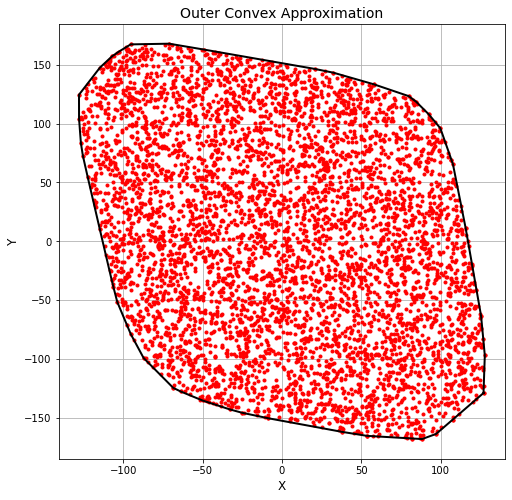

In [57]:
#import các thư viện cần thiết
import numpy as np
import math
import matplotlib.pyplot as plt
np.random.seed(42)

#Khởi tạo 
N_square = 10000

k=16
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0

def outer_convex_approximation(X, δ):
    #Rotation angle
    alpha = -math.pi/2

    #Rotation Matrix
    R = np.array([[math.cos(alpha), math.sin(alpha)],[-math.sin(alpha), math.cos(alpha)]])
#     print("Tập X: ", X)
    # Step I: Determine D, βd, and P
    D = [(1, 0), (0, 1), (-1, 0), (0, -1)] #khởi tạo D theo công thức (7)
#     βd = [np.max(np.dot(X, d)) for d in D] #khởi tạo βd theo công thức (6)
    #công thức (8)
    min_x = np.min((X[:, 0]))
    max_x = np.max(X[:, 0])
    min_y = np.min((X[:, 1]))
    max_y = np.max(X[:, 1])
    
    print("minx", min_x)
    print("maxx", max_x)
    print("miny", min_y)
    print("maxy", max_y)
    
    #các giá trị r1, r2, r3, r4 đặt theo công thức (10)
    r1 = (max_x, max_y)
    r2 = (min_x, max_y)
    r3 = (min_x, min_y)
    r4 = (max_x, min_y)
    
#     print(r1, r2, r3, r4)
    
    P = np.array([r1, r2, r3, r4]) #Khởi tạo P theo công thức (9)
    print("P", P)

    #STEP II: gán Pdoubt = P
    Pdoubt = P[:]
    Ptest = P[:]
    global count4, count1, count2, count3, count5
    # Step III: Iterate until Pdoubt is empty
    count = 0 #Đặt biến count để xem số lần chạy

    while Pdoubt.shape[0] > 0: #Nếu số đỉnh Pdoubt > 0, tiếp tục lặp
        count += 1
        print("Lượt chạy:", count)
        print("Pd", Pdoubt)
        pdoubt = Pdoubt[0] #Lấy một giá trị pdoubt ∈ Pdoubt
        print("pdoubt",pdoubt)
        
        #Xác định số liền trước và liền sau ngược chiều kim đồng hồ của pdoubt
        pdoubt_index_idx = np.where(np.all(Ptest == pdoubt, axis=1))[0][0]
        pdoubt_minus = Ptest[(pdoubt_index_idx - 1 ) % len(Ptest)] #liền trước
        pdoubt_plus = Ptest[(pdoubt_index_idx + 1) % len(Ptest)] #liền sau
        
        print("pdoubt_minus",pdoubt_minus)
        print("pdoubt_plus",pdoubt_plus)
        
        #Xác định dp
        dp = np.dot(R, ((pdoubt_minus - pdoubt_plus).T)) / np.linalg.norm(pdoubt_minus - pdoubt_plus)
        # p^+ = pdoubt_plus
        # p^- = pdoubt_minus
        # np.dot(R, ((pdoubt_plus - pdoubt_minus).T)) là phép nhân ma trận giữa ma trận R và ma trận chuyển vị của
        # (pdoubt_plus - pdoubt_minus)
        # np.linalg.norm(pdoubt_plus - pdoubt_minus) là khoảng cách Euclid ||p+ − p-||
        
        print("dp: ", dp)
        print("do lon dp: ",np.linalg.norm(dp))
        #xác định βdp
        βdp = np.max(np.dot(dp, X.T))
        # lấy max của phép nhân ma trận giữa dp và ma trận chuyển vị của vector x ∈ X
        
        print("βdp", βdp)
        
        
        Xp = []
        for a in X:
            if np.dot(dp, a.T) == βdp:
                Xp.append(a)
        print("Xp: ",Xp)
        #kiểm tra công thức (16)
        print("dp*pdoubt_plus: ", np.dot(dp, pdoubt_plus))
        print("dp*(pdoubt.T): ", np.dot(dp, pdoubt.T))
        hieu = np.dot(dp, pdoubt.T)
        print("Hieu: ", hieu - βdp)
        if βdp == np.dot(dp, pdoubt_plus):
            count1 += 1 
            #Loại bỏ các phần tử khỏi mảng theo (17)
            print("trường hợp 1")
            D.append(dp)  # Thêm dp vào danh sách D
#             # Tìm hướng tối đa từ cạnh [p^-, p]
#             d_minus = (pdoubt - pdoubt_minus) / np.linalg.norm(pdoubt - pdoubt_minus)
#             # Tìm hướng tối đa từ cạnh [p, p^+]
#             d_plus = (pdoubt - pdoubt_plus) / np.linalg.norm(pdoubt - pdoubt_plus)
            
#             print("ddd", d_minus)
#             print("ddddd", d_plus)
#             # Tìm vị trí của hướng tối đa từ cạnh [p^-, p]
#             index_minus = D.index(d_minus)

#             # Tìm vị trí của hướng tối đa từ cạnh [p, p^+]
#             index_plus = D.index(d_plus)

#             # Xóa các phần tử từ danh sách D
#             del D[index_minus]
#             del D[index_plus]
#             print(D)
            
            P = np.delete(P, np.where(np.all(P == pdoubt, axis=1))[0], axis=0)
            Pdoubt = np.delete(Pdoubt, np.where(np.all(Pdoubt == pdoubt, axis=1))[0], axis=0)
            Ptest = np.delete(Ptest, np.where(np.all(Ptest == pdoubt, axis=1))[0], axis=0)
            #Loại bỏ p, p+, p- theo công thức (22)
#             Pdoubt = np.delete(Pdoubt, np.where(np.all(Pdoubt == pdoubt, axis=1))[0], axis=0)
#             Pdoubt = np.delete(Pdoubt, np.where(np.all(Pdoubt == pdoubt_minus, axis=1))[0], axis=0)
#             Pdoubt = np.delete(Pdoubt, np.where(np.all(Pdoubt == pdoubt_plus, axis=1))[0], axis=0)
#             Pdoubt = Pdoubt[~np.all(Pdoubt == pdoubt, axis=1) & ~np.all(Pdoubt == pdoubt_minus, axis=1) & ~np.all(Pdoubt == pdoubt_plus, axis=1)]
#             Ptest = Ptest[~np.all(Ptest == pdoubt, axis=1) & ~np.all(Ptest == pdoubt_minus, axis=1) & ~np.all(Ptest == pdoubt_plus, axis=1)]
            
        #Kiểm tra (18) và (19)
        elif np.dot(dp, pdoubt.T) - βdp > δ:
            count2 += 1
            print("Trường hợp 2")
            #Khởi tạo (20)
            λp = (βdp - np.dot(dp, pdoubt_minus.T)) / (np.dot(dp, pdoubt.T) - np.dot(dp, pdoubt_minus.T)) #λp
            p_hat_minus = (1 - λp) * (pdoubt_minus.T) + λp * (pdoubt.T) #p^
            p_hat_plus = (1 - λp) * (pdoubt_plus.T) + λp * (pdoubt.T) #p^+
            
            print("p_hat_minus", p_hat_minus)
            print("p_hat_plus", p_hat_plus)
            #Thêm xóa theo (21)
            D.append((dp[0], dp[1]))  # Thêm dp vào danh sách D
            # Tìm chỉ số của pdoubt trong mảng Pdoubt
            pdoubt_indexp = np.where(np.all(P == pdoubt, axis=1))[0][0]
            
            #thêm (23)
            # Tìm chỉ số của pdoubt trong mảng Pdoubt
            pdoubt_index = np.where(np.all(Pdoubt == pdoubt, axis=1))[0][0]

            # Xóa pdoubt khỏi mảng Pdoubt và thêm p_hat_minus và p_hat_plus
            Pdoubt = np.delete(Pdoubt, pdoubt_index, axis=0)
                    
            if np.allclose(p_hat_plus, pdoubt) and np.allclose(p_hat_minus, pdoubt):
                count4 += 1
                ptest_index = np.where(np.all(Ptest == pdoubt, axis=1))[0][0]
                Ptest = np.concatenate((Ptest[:ptest_index], Ptest[ptest_index+1:], [Ptest[ptest_index]]))

            else:
                # Xóa pdoubt khỏi mảng P
                P = np.delete(P, pdoubt_indexp, axis=0)
                
                #test với Ptest
                ptest_index = np.where(np.all(Ptest == pdoubt, axis=1))[0][0]
                Ptest = np.delete(Ptest, ptest_index, axis=0)
                
                if np.allclose(p_hat_plus, pdoubt_plus):
                    print("1")
                else:
                    P = np.insert(P, pdoubt_indexp, p_hat_plus, axis=0)
                    Pdoubt = np.insert(Pdoubt, pdoubt_index, p_hat_plus, axis=0)
                    Ptest = np.insert(Ptest, ptest_index, p_hat_plus, axis=0)
                if np.allclose(p_hat_minus, pdoubt_minus):
                    print("2")
                else:
                    P = np.insert(P, pdoubt_indexp, p_hat_minus, axis=0)
                    Pdoubt = np.insert(Pdoubt, pdoubt_index, p_hat_minus, axis=0)
                    Ptest = np.insert(Ptest, ptest_index, p_hat_minus, axis=0)


            print("P:", P)
            print("Pdoubt: ", Pdoubt)
            print("Ptest: ", Ptest)
        #kiểm tra (26)
        elif np.linalg.norm(pdoubt - Xp) > δ:
            count5 += 1
            print("Trường hợp 4")
            #Khởi tạo (20)
            λp = (βdp - np.dot(dp, pdoubt_minus.T)) / (np.dot(dp, pdoubt.T) - np.dot(dp, pdoubt_minus.T)) #λp
            p_hat_minus = (1 - λp) * (pdoubt_minus.T) + λp * (pdoubt.T) #p^
            p_hat_plus = (1 - λp) * (pdoubt_plus.T) + λp * (pdoubt.T) #p^+
            
            print("p_hat_minus", p_hat_minus)
            print("p_hat_plus", p_hat_plus)
            #Thêm xóa theo (21)
            D.append((dp[0], dp[1]))  # Thêm dp vào danh sách D
            # Tìm chỉ số của pdoubt trong mảng Pdoubt
            pdoubt_indexp = np.where(np.all(P == pdoubt, axis=1))[0][0]
            
            #thêm (23)
            # Tìm chỉ số của pdoubt trong mảng Pdoubt
            pdoubt_index = np.where(np.all(Pdoubt == pdoubt, axis=1))[0][0]

            # Xóa pdoubt khỏi mảng Pdoubt và thêm p_hat_minus và p_hat_plus
            Pdoubt = np.delete(Pdoubt, pdoubt_index, axis=0)
                    
            if np.allclose(p_hat_plus, pdoubt) and np.allclose(p_hat_minus, pdoubt):
                count4 += 1
                ptest_index = np.where(np.all(Ptest == pdoubt, axis=1))[0][0]
                Ptest = np.concatenate((Ptest[:ptest_index], Ptest[ptest_index+1:], [Ptest[ptest_index]]))

            else:
                # Xóa pdoubt khỏi mảng P
                P = np.delete(P, pdoubt_indexp, axis=0)
                
                #test với Ptest
                ptest_index = np.where(np.all(Ptest == pdoubt, axis=1))[0][0]
                Ptest = np.delete(Ptest, ptest_index, axis=0)
                
                if np.allclose(p_hat_plus, pdoubt_plus):
                    print("1")
                else:
                    P = np.insert(P, pdoubt_indexp, p_hat_plus, axis=0)
                    Pdoubt = np.insert(Pdoubt, pdoubt_index, p_hat_plus, axis=0)
                    Ptest = np.insert(Ptest, ptest_index, p_hat_plus, axis=0)
                if np.allclose(p_hat_minus, pdoubt_minus):
                    print("2")
                else:
                    P = np.insert(P, pdoubt_indexp, p_hat_minus, axis=0)
                    Pdoubt = np.insert(Pdoubt, pdoubt_index, p_hat_minus, axis=0)
                    Ptest = np.insert(Ptest, ptest_index, p_hat_minus, axis=0)


            print("P:", P)
            print("Pdoubt: ", Pdoubt)
            print("Ptest: ", Ptest)
        #các trường hợp còn lại
        else:
            count3 += 1
            print("trường hợp 3")
            Pdoubt = np.delete(Pdoubt, np.where(np.all(Pdoubt == pdoubt, axis=1))[0][0], axis=0) #xóa pboubt khỏi Pboubt
            print(Pdoubt)
            
            ptest_index = np.where(np.all(Ptest == pdoubt, axis=1))[0]
            Ptest = np.concatenate((Ptest[:ptest_index[0]], Ptest[ptest_index[0]+1:], [Ptest[ptest_index[0]]]))
            print("Ptest: ", Ptest)
    # Step V: Return D, βd, and P
    return D, P


# Test the algorithm with data
p1 = np.array([-130.658, -128])
p2 = np.array([-87.522, -128])
p3 = np.array([48.95, -104.547])
p4 = np.array([97.871, -89.647])
p5 = np.array([124.452, -69.508])
p6 = np.array([143.815, -35.205])
p7 = np.array([168, 62.629])
p8 = np.array([168, 96])
p9 = np.array([127.717, 128])
p10 = np.array([82.477, 128])
p11 = np.array([-61.85, 109.243])
p12 = np.array([-102.638, 98.195])
p13 = np.array([-124.269, 81.396])
p14 = np.array([-140.644, 46.529])
p15 = np.array([-168, -67.84])
p16 = np.array([-168, -99.849])

#List of set of cut points
P = np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9, p10,p11, p12, p13,p14, p15, p16, p1])


#Khởi tạo X

#Rotation angle
alpha = -math.pi/2

#Rotation Matrix
R = np.array([[math.cos(alpha), math.sin(alpha)],[-math.sin(alpha), math.cos(alpha)]])

#Rotate the set of cut points
po = np.dot(P, R)


# Determine min, max of p
#công thức (8)
x_min = np.nanmin(po[:, 0])
x_max = np.nanmax(po[:, 0])
y_min = np.nanmin(po[:, 1])
y_max = np.nanmax(po[:, 1])

xy_min = [x_min, y_min]
xy_max = [x_max , y_max]

print(x_min)
print(x_max)
print(y_min)
print(y_max)

#Khởi tạo X
X = np.random.uniform(low=xy_min, high=xy_max, size=(N_square, 2))
def outside( points, a, b ):
    res = np.array([])
    nx = b[1] - a[1]
    ny = a[0] - b[0]
    d =  nx * a[0] + ny * a[1]
    l =  nx * points[:,0] + ny* points[:,1]
    res = np.append(res, l-d >= 0)
    return res


#Delete the points outside the polygon to creat a test set
for j in range( k ):
    X = np.delete(X, np.where(outside(X[:], po[j], po[j+1])), 0)
X = X[0:5500]


δ = 0.1
D, P = outer_convex_approximation(X, δ)

print("D:", D)
# print("βd:", βd)
print("P: ",P)
print("Số đỉnh: ", P.shape[0])

print("Số trường hợp 1: ",count1)
print("Số trường hợp 2: ",count2)
print("Số trường hợp 3: ",count5)
print("Số trường hợp 4: ",count3)
print("count4: ",count4)
# Plotting
from scipy.spatial import ConvexHull

# Tạo các mảng x và y từ tập P
x = P[:, 0]
y = P[:, 1]

# Tìm bao lồi của tập điểm
points = np.column_stack((x, y))
hull = ConvexHull(points)

# Lấy các điểm trên bao lồi
convex_points = points[hull.vertices]

# Thêm điểm đầu tiên vào cuối cùng để tạo thành đa giác hoàn chỉnh
convex_points = np.vstack((convex_points, convex_points[0]))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(X[:, 0], X[:, 1], 'r.')
ax.plot(P[:, 0], P[:, 1], 'r.')
ax.plot(convex_points[:, 0], convex_points[:, 1], 'k-', linewidth=2)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Outer Convex Approximation', fontsize=14)
plt.grid(True)
plt.show()



# Thuật toán 4

Lượt chạy thứ:  1
E_test:  [[[ 127.83367692  -96.95909731]
  [ -71.03461269  167.89019696]]

 [[ -71.03461269  167.89019696]
  [-127.83273197  124.54479547]]

 [[-127.83273197  124.54479547]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ 127.83367692  -96.95909731]]]
edoubt:  [[127.83367692 -96.95909731]
 [-71.03461269 167.89019696]]
p:  [127.83367692 -96.95909731]
p_plus:  [-71.03461269 167.89019696]
Xpp_plus:  [[-113.13059528  123.03518498]
 [  85.10531604  -96.65405881]
 [ -81.45280839 -106.37608469]
 ...
 [-108.00391968  -24.38851962]
 [  37.52890465  -50.15858082]
 [ -58.01371696   26.00615376]]
βpp_plus:  129.47213187720052
Bpp_plus [ -68.47846599 -124.42786332]
p_hat:  [ -68.47846599 -124.42786332]
p:  [127.83367692 -96.95909731]
Xpp_hat:  [[  28.63434105 -121.13006282]
 [  23.65812963 -152.39266133]
 [ -50.01887509 -135.18216969]
 ...
 [  24.76514887 -126.75934163]
 [ 118.5573528  -126.71380516]
 [  89.27649991 -121.22993789]]
Xp_hat_p_plus:  [[-113.13059

Xpp_plus:  []
Edoubt:  [[[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ -68.47846599 -124.42786332]]

 [[ -68.47846599 -124.42786332]
  [ -71.03461269  167.89019696]]

 [[ -71.03461269  167.89019696]
  [-127.83273197  124.54479547]]

 [[-127.83273197  124.54479547]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  9
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ -68.47846599 -124.42786332]]

 [[ -68.47846599 -124.42786332]
  [ -71.03461269  167.89019696]]

 [[ -71.03461269  167.89019696]
  [-127.83273197  124.54479547]]

 [[-127.83273197  124.54479547]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.9190

Xpp_plus:  [[ -50.01887509 -135.18216969]
 [ -50.36156222 -134.0486075 ]
 [ -23.78073878 -145.82069237]
 [ -47.03484167 -133.76415761]
 [ -51.69863459 -132.59738612]
 [ -47.38087819 -135.52733568]
 [ -63.77495043 -127.52969376]
 [ -10.40802417 -149.48588419]
 [ -51.34768005 -134.34792084]
 [ -38.35224977 -140.02542689]
 [ -41.63607594 -137.86049121]
 [ -45.93581456 -136.57723847]
 [ -48.39090653 -134.51292218]
 [ -43.35796356 -137.65296374]
 [ -32.11874497 -140.85818414]
 [ -15.48991678 -147.68983388]
 [ -57.81149248 -129.84567327]
 [ -32.9794251  -142.68075487]
 [ -25.04947809 -145.61497864]]
βpp_plus:  144.0735049062988
Bpp_plus [ -32.9794251  -142.68075487]
p_hat:  [ -32.9794251  -142.68075487]
p:  [  -8.52911211 -150.28951061]
Xpp_hat:  [[ -23.78073878 -145.82069237]
 [ -25.04947809 -145.61497864]]
Xp_hat_p_plus:  [[ -50.01887509 -135.18216969]
 [ -50.36156222 -134.0486075 ]
 [ -23.78073878 -145.82069237]
 [ -47.03484167 -133.76415761]
 [ -51.69863459 -132.59738612]
 [ -47.38087819

Bpp_plus [-127.79788516  104.20707049]
p_hat:  [-127.79788516  104.20707049]
p:  [ -68.47846599 -124.42786332]
Xpp_hat:  [[ -81.45280839 -106.37608469]
 [-119.95412846   45.83389818]
 [ -97.31446596  -54.56130241]
 [-117.56156376   30.54002891]
 [-104.01925944  -44.44749017]
 [-114.76947938   10.53515621]
 [ -87.95211708  -83.91838622]
 [-104.65123762   -1.87477762]
 [-113.26495744   16.64170446]
 [-109.10807943   18.09503956]
 [ -84.75262385  -74.39364609]
 [ -80.76261904  -97.65862736]
 [-100.5639651   -17.66944475]
 [-105.74840625   12.46779805]
 [-107.46016111    8.2358269 ]
 [ -99.31804104  -34.32051872]
 [ -76.38340607 -113.0116032 ]
 [ -89.17123079  -63.26138522]
 [ -95.36290244  -34.51147037]
 [ -75.48425204 -103.92892586]
 [ -84.05010282  -76.50473829]
 [-105.73138946  -30.75972041]
 [-110.75824602   27.60927462]
 [-111.56251211   27.54239104]
 [-114.69535139   13.87556866]
 [ -82.00112413  -88.18544283]
 [-116.88639159   44.7388622 ]
 [-110.22749626    6.40408975]
 [-103.2508

Xpp_plus:  []
Edoubt:  [[[-103.72340766  -51.45604433]
  [-127.79788516  104.20707049]]

 [[-127.79788516  104.20707049]
  [ -71.03461269  167.89019696]]

 [[ -71.03461269  167.89019696]
  [-127.83273197  124.54479547]]

 [[-127.83273197  124.54479547]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  36
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.614

Xpp_hat:  []
Xp_hat_p_plus:  [[-122.41321043   55.03333455]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.07631042 -163.62856829]
 [ 107.57042844 -151.48273606]
 [  -8.52911211 -150.28951061]
 [  53.44400774 -165.18980289]
 [  82.22676033 -167.47412466]
 [  37.91414458 -161.83158298]
 [ -32.9794251  -142.68075487]
 [ -25.04947809 -145.61497864]
 [ -50.01887509 -135.18216969]
 [ -63.77495043 -127.52969376]
 [-127.79788516  104.20707049]
 [-103.72340766  -51.45604433]
 [ -87.13473709  -99.05856798]
 [ -95.17313349  -78.89922596]
 [ -97.66332836  -70.93466053]
 [-125.36716904   72.59279101]
 [-107.28466354  -32.59865993]
 [-106.21350755  -38.43920892]
 [-114.76947938   10.53515621]
 [-122.41321043   55.03333455]]
kiểu mảng:  2
A:  [[-114.76947938   10.53515621]
 [-122.41321043   55.03333455]]
B:  [[-122.

Xpp_hat:  []
Xp_hat_p_plus:  [[-111.3467922   150.82554052]
 [-114.64064206  147.57930975]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.07631042 -163.62856829]
 [ 107.57042844 -151.48273606]
 [  -8.52911211 -150.28951061]
 [  53.44400774 -165.18980289]
 [  82.22676033 -167.47412466]
 [  37.91414458 -161.83158298]
 [ -32.9794251  -142.68075487]
 [ -25.04947809 -145.61497864]
 [ -50.01887509 -135.18216969]
 [ -63.77495043 -127.52969376]
 [-127.79788516  104.20707049]
 [-103.72340766  -51.45604433]
 [ -87.13473709  -99.05856798]
 [ -95.17313349  -78.89922596]
 [ -97.66332836  -70.93466053]
 [-125.36716904   72.59279101]
 [-107.28466354  -32.59865993]
 [-106.21350755  -38.43920892]
 [-114.76947938   10.53515621]
 [-122.41321043   55.03333455]
 [-126.63065889   83.40823888]
 [-106.96405313  157.20097171]


Xpp_hat:  [[-32.11772958 151.44000695]
 [ 59.3904491   33.14925069]
 [ 25.88544301  69.91238614]
 ...
 [-18.08824746 121.5085557 ]
 [  8.29406393 133.96086608]
 [ 68.92318811  74.83636542]]
Xp_hat_p_plus:  [[-113.13059528  123.03518498]
 [  85.10531604  -96.65405881]
 [ -81.45280839 -106.37608469]
 ...
 [-108.00391968  -24.38851962]
 [  37.52890465  -50.15858082]
 [ -58.01371696   26.00615376]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.07631042 -163.62856829]
 [ 107.57042844 -151.48273606]
 [  -8.52911211 -150.28951061]
 [  53.44400774 -165.18980289]
 [  82.22676033 -167.47412466]
 [  37.91414458 -161.83158298]
 [ -32.9794251  -142.68075487]
 [ -25.04947809 -145.61497864]
 [ -50.01887509 -135.18216969]
 [ -63.77495043 -127.52969376]
 [-127.79788516  104.20707049]
 [-103.72340766  -51.45604433]
 [ -

βpp_plus:  145.91687042814823
Bpp_plus [ 32.40768284 143.26455586]
p_hat:  [ 32.40768284 143.26455586]
p:  [ 20.64517783 146.47491541]
Xpp_hat:  [[ 32.40768284 143.26455586]]
Xp_hat_p_plus:  [[ 57.84465379 133.42904734]
 [ 32.40768284 143.26455586]
 [ 27.31246674 144.63072978]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.07631042 -163.62856829]
 [ 107.57042844 -151.48273606]
 [  -8.52911211 -150.28951061]
 [  53.44400774 -165.18980289]
 [  82.22676033 -167.47412466]
 [  37.91414458 -161.83158298]
 [ -32.9794251  -142.68075487]
 [ -25.04947809 -145.61497864]
 [ -50.01887509 -135.18216969]
 [ -63.77495043 -127.52969376]
 [-127.79788516  104.20707049]
 [-103.72340766  -51.45604433]
 [ -87.13473709  -99.05856798]
 [ -95.17313349  -78.89922596]
 [ -97.66332836  -70.93466053]
 [-125.36716904   72.59279101]

Xpp_plus:  [[99.8312624 96.0289563]]
βpp_plus:  135.38809631031233
Bpp_plus [99.8312624 96.0289563]
p_hat:  [99.8312624 96.0289563]
p:  [ 92.39820354 108.07325665]
2
Lượt chạy thứ:  77
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68075487]
  [ -50.01887509 -135.18216969]]

 [[ -50.01887509 -135.18216969]
  [ -63.77495043 -127.52969376]]

 [[ -63.774950

 [115.77958772  11.10657747]]
Edoubt:  [[[  99.8312624    96.0289563 ]
  [ 107.7745974    65.38406356]]

 [[ 107.7745974    65.38406356]
  [ 115.77958772   11.10657747]]

 [[ 115.77958772   11.10657747]
  [ 127.83367692  -96.95909731]]

 [[ 127.83367692  -96.95909731]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [-127.83273197  124.54479547]]

 [[-127.83273197  124.54479547]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  80
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.9

Xpp_plus:  []
Edoubt:  [[[ 127.83367692  -96.95909731]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [-127.83273197  124.54479547]]

 [[-127.83273197  124.54479547]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  89
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.680

βpp_plus:  165.16066090614453
Bpp_plus [  88.30729658 -167.91906616]
p_hat:  [  88.30729658 -167.91906616]
p:  [  97.07631042 -163.62856829]
Xpp_hat:  []
Xp_hat_p_plus:  [[  45.45647663 -162.42648948]
 [  77.53048284 -166.44364027]
 [  68.94205277 -164.29349515]
 [  82.22676033 -167.47412466]
 [  86.87065404 -166.71650599]
 [  86.7833159  -164.16355756]
 [  57.20264137 -164.95780171]
 [  61.11312659 -163.38149385]
 [  53.44400774 -165.18980289]
 [  72.57638466 -164.46755655]
 [  49.69770342 -162.58211882]
 [  78.51719878 -166.77147939]
 [  37.91414458 -161.83158298]
 [  81.12076439 -163.31312972]
 [  88.9228938  -164.79491145]
 [  88.30729658 -167.91906616]
 [  81.46227235 -166.10089277]
 [  60.41202912 -165.36410646]
 [  78.27554113 -164.8945823 ]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.0763104

βpp_plus:  147.66713845829617
Bpp_plus [  -8.52911211 -150.28951061]
p_hat:  [  -8.52911211 -150.28951061]
p:  [  37.91414458 -161.83158298]
Xpp_hat:  []
Xp_hat_p_plus:  [[ -10.40802417 -149.48588419]
 [  -8.52911211 -150.28951061]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.07631042 -163.62856829]
 [ 107.57042844 -151.48273606]
 [  -8.52911211 -150.28951061]
 [  53.44400774 -165.18980289]
 [  82.22676033 -167.47412466]
 [  37.91414458 -161.83158298]
 [ -32.9794251  -142.68075487]
 [ -25.04947809 -145.61497864]
 [ -50.01887509 -135.18216969]
 [ -63.77495043 -127.52969376]
 [-127.79788516  104.20707049]
 [-103.72340766  -51.45604433]
 [ -87.13473709  -99.05856798]
 [ -95.17313349  -78.89922596]
 [ -97.66332836  -70.93466053]
 [-125.36716904   72.59279101]
 [-107.28466354  -32.59865993]
 [-106.2135075

Xpp_plus:  []
Edoubt:  [[[ -68.47846599 -124.42786332]
  [-127.83273197  124.54479547]]

 [[-127.83273197  124.54479547]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  114
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68075487]
  [ -50.01887509 -135.18216969]]

 [[ -50.01887509 -135.18

Xpp_plus:  []
Edoubt:  [[[-103.72340766  -51.45604433]
  [-127.83273197  124.54479547]]

 [[-127.83273197  124.54479547]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  122
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68075487]
  [ -50.01887509 -135.18216969]]

 [[ -50.01887509 -135.18

βpp_plus:  111.4023340114743
Bpp_plus [-122.41321043   55.03333455]
p_hat:  [-122.41321043   55.03333455]
p:  [-114.76947938   10.53515621]
Xpp_hat:  []
Xp_hat_p_plus:  [[-122.41321043   55.03333455]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.07631042 -163.62856829]
 [ 107.57042844 -151.48273606]
 [  -8.52911211 -150.28951061]
 [  53.44400774 -165.18980289]
 [  82.22676033 -167.47412466]
 [  37.91414458 -161.83158298]
 [ -32.9794251  -142.68075487]
 [ -25.04947809 -145.61497864]
 [ -50.01887509 -135.18216969]
 [ -63.77495043 -127.52969376]
 [-127.79788516  104.20707049]
 [-103.72340766  -51.45604433]
 [ -87.13473709  -99.05856798]
 [ -95.17313349  -78.89922596]
 [ -97.66332836  -70.93466053]
 [-125.36716904   72.59279101]
 [-107.28466354  -32.59865993]
 [-106.21350755  -38.43920892]
 [-114.76947938

Xpp_plus:  [[ -32.11772958  151.44000695]
 [-111.3467922   150.82554052]
 [-119.19653859  137.5316551 ]
 ...
 [ -18.08824746  121.5085557 ]
 [ -66.88542415  140.32475215]
 [   8.29406393  133.96086608]]
βpp_plus:  162.12454884099574
Bpp_plus [-71.03461269 167.89019696]
p_hat:  [-71.03461269 167.89019696]
p:  [-127.83273197  124.54479547]
Xpp_hat:  [[-111.3467922   150.82554052]
 [-119.19653859  137.5316551 ]
 [ -98.07410158  147.78359353]
 [-101.75750963  146.90877171]
 [-112.57154809  145.97050501]
 [-105.56345683  146.81782854]
 [-118.16285467  134.99202936]
 [-106.96405313  157.20097171]
 [ -98.26842619  153.18872653]
 [-109.48698233  152.91870965]
 [ -93.62563817  153.86586468]
 [-110.33405629  148.10359889]
 [-108.65059485  151.6782022 ]
 [ -73.82120997  166.53205279]
 [ -89.47909862  157.27366417]
 [ -97.61047155  161.47092429]
 [ -88.01241397  164.10945397]
 [ -95.75546973  160.99492251]
 [ -82.71438059  163.74494928]
 [ -95.85925379  155.72926235]
 [-107.36245628  147.69504591]

Xpp_plus:  []
Edoubt:  [[[-102.79998746  161.0852926 ]
  [ -95.24481512  167.29948516]]

 [[ -95.24481512  167.29948516]
  [ -71.03461269  167.89019696]]

 [[ -71.03461269  167.89019696]
  [  92.39820354  108.07325665]]

 [[  92.39820354  108.07325665]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  146
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61

Xpp_plus:  [[ 81.41178008 121.20547597]
 [ 57.84465379 133.42904734]
 [ 54.61749399 132.78949746]
 [ 67.18942355 126.59325395]
 [ 56.15452733 131.12670581]
 [ 82.54012766 120.14094545]
 [ 82.47805103 117.71692838]
 [ 60.55301845 128.68592514]
 [ 83.30641002 115.87677285]
 [ 70.92461713 121.70019915]
 [ 50.64519309 134.48874136]
 [ 64.88886033 125.28076565]
 [ 77.41338382 121.43646349]
 [ 76.23799842 122.42706553]
 [ 78.11051744 117.64459885]
 [ 88.77696048 111.53235801]
 [ 79.86374205 123.36312274]
 [ 42.76143542 138.28983412]
 [ 57.57766314 132.64002764]
 [ 41.29381435 138.18206702]
 [ 58.04411811 132.6899759 ]
 [ 37.67284765 140.25508654]
 [ 85.04980058 116.37319004]
 [ 84.51555898 118.64542676]]
βpp_plus:  146.81573454143344
Bpp_plus [ 79.86374205 123.36312274]
p_hat:  [ 79.86374205 123.36312274]
p:  [ 32.40768284 143.26455586]
Xpp_hat:  [[ 57.84465379 133.42904734]
 [ 58.04411811 132.6899759 ]]
Xp_hat_p_plus:  [[ 81.41178008 121.20547597]
 [ 57.84465379 133.42904734]
 [ 54.61749399

βpp_plus:  140.57898360780132
Bpp_plus [ 84.51555898 118.64542676]
p_hat:  [ 84.51555898 118.64542676]
p:  [ 79.86374205 123.36312274]
Xpp_hat:  []
Xp_hat_p_plus:  [[ 82.54012766 120.14094545]
 [ 84.51555898 118.64542676]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.07631042 -163.62856829]
 [ 107.57042844 -151.48273606]
 [  -8.52911211 -150.28951061]
 [  53.44400774 -165.18980289]
 [  82.22676033 -167.47412466]
 [  37.91414458 -161.83158298]
 [ -32.9794251  -142.68075487]
 [ -25.04947809 -145.61497864]
 [ -50.01887509 -135.18216969]
 [ -63.77495043 -127.52969376]
 [-127.79788516  104.20707049]
 [-103.72340766  -51.45604433]
 [ -87.13473709  -99.05856798]
 [ -95.17313349  -78.89922596]
 [ -97.66332836  -70.93466053]
 [-125.36716904   72.59279101]
 [-107.28466354  -32.59865993]
 [-106.21350755  -38.439

βpp_plus:  117.33534444213316
Bpp_plus [107.7745974   65.38406356]
p_hat:  [107.7745974   65.38406356]
p:  [ 92.39820354 108.07325665]
Xpp_hat:  [[ 99.09412461  94.03818341]
 [104.8203804   74.64012711]
 [107.7745974   65.38406356]
 [100.73855268  86.2811789 ]
 [106.66063429  69.04687505]
 [102.70147154  84.2247888 ]
 [ 96.18356136 101.27604847]
 [106.74655975  69.47313471]
 [ 99.8312624   96.0289563 ]
 [ 95.43585922  99.787852  ]]
Xp_hat_p_plus:  [[ 99.09412461  94.03818341]
 [121.09070202 -35.91916451]
 [112.6989418   25.35932377]
 [109.92025322  19.07233205]
 [104.05686041  41.74396663]
 [110.62228032  21.88474969]
 [115.26076258 -18.14206029]
 [113.73222121  -8.6640232 ]
 [113.85139771 -10.95309222]
 [107.73704904  39.19450568]
 [121.82150549 -54.80301396]
 [ 94.91288329  94.88152264]
 [ 94.22251267 102.79093444]
 [119.25047326 -22.68071288]
 [117.65162095  -4.08104124]
 [119.58441351 -27.63231096]
 [104.34841665  71.91496854]
 [123.90736978 -71.09577289]
 [118.05068426 -37.1340833

Xpp_plus:  [[125.4678646  -63.20850958]]
βpp_plus:  116.24386404174514
Bpp_plus [125.4678646  -63.20850958]
p_hat:  [125.4678646  -63.20850958]
p:  [115.77958772  11.10657747]
2
Lượt chạy thứ:  172
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68075487]
  [ -50.01887509 -135.18216969]]

 [[ -50.01887509 -135.18216969]
  [ -63.77495043 -127.52969376]]

 

Xpp_plus:  []
Edoubt:  [[[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  181
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68075487]
  [ -50.01887509 -135.18216969]]

 [[ -50.01887509 -135.18216969]
  [ -63.77495043 -127.52969376]]

 [[ -63.77495043 -127.52

Xpp_hat:  [[  82.22676033 -167.47412466]
 [  53.44400774 -165.18980289]]
Xp_hat_p_plus:  [[  45.45647663 -162.42648948]
 [  20.0397161  -155.923396  ]
 [  77.53048284 -166.44364027]
 [  82.22676033 -167.47412466]
 [  57.20264137 -164.95780171]
 [  61.11312659 -163.38149385]
 [  53.44400774 -165.18980289]
 [  49.69770342 -162.58211882]
 [  78.51719878 -166.77147939]
 [  37.91414458 -161.83158298]
 [  36.2443984  -160.126527  ]
 [  38.36516396 -159.70170798]
 [  25.16635538 -157.59387725]
 [  47.02708371 -161.38643963]
 [  47.70985128 -161.83247661]
 [  47.57875005 -161.99282936]
 [  48.15715232 -160.8889585 ]
 [  60.41202912 -165.36410646]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.07631042 -163.62856829]
 [ 107.57042844 -151.48273606]
 [  -8.52911211 -150.28951061]
 [  53.44400774 -165.18980289]
 [

Xpp_plus:  []
Edoubt:  [[[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68075487]
  [ -68.47846599 -124.42786332]]

 [[ -68.47846599 -124.42786332]
  [-127.83273197  124.54479547]]

 [[-127.83273197  124.54479547]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  195
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68

Xpp_plus:  [[ -81.45280839 -106.37608469]
 [ -76.38340607 -113.0116032 ]
 [ -97.66332836  -70.93466053]
 [ -84.51046245 -102.48833283]
 [ -86.26710686  -89.43888808]
 [ -80.2329352  -104.75398088]
 [ -78.63306011 -103.78851078]
 [ -84.28536744  -91.78273362]
 [ -87.13473709  -99.05856798]
 [ -95.17313349  -78.89922596]
 [ -85.95428679  -88.43586038]
 [ -85.60126479  -99.43145238]
 [ -93.13941956  -83.87465496]
 [ -80.20505987 -101.33735497]]
βpp_plus:  121.5447392655574
Bpp_plus [-87.13473709 -99.05856798]
p_hat:  [-87.13473709 -99.05856798]
p:  [ -68.47846599 -124.42786332]
Xpp_hat:  []
Xp_hat_p_plus:  [[ -81.45280839 -106.37608469]
 [ -76.38340607 -113.0116032 ]
 [ -97.66332836  -70.93466053]
 [ -84.51046245 -102.48833283]
 [ -86.26710686  -89.43888808]
 [ -80.2329352  -104.75398088]
 [ -78.63306011 -103.78851078]
 [ -84.28536744  -91.78273362]
 [ -87.13473709  -99.05856798]
 [ -95.17313349  -78.89922596]
 [ -85.95428679  -88.43586038]
 [ -85.60126479  -99.43145238]
 [ -93.13941956  

Bpp_plus [-125.36716904   72.59279101]
p_hat:  [-125.36716904   72.59279101]
p:  [-103.72340766  -51.45604433]
Xpp_hat:  [[-114.76947938   10.53515621]
 [-107.28466354  -32.59865993]
 [-122.41321043   55.03333455]
 [-106.21350755  -38.43920892]
 [-106.46331846  -35.91708706]
 [-110.78639768  -11.8643386 ]]
Xp_hat_p_plus:  [[-126.58633802  105.99503996]
 [-119.95412846   45.83389818]
 [-117.56156376   30.54002891]
 [-114.76947938   10.53515621]
 [-113.26495744   16.64170446]
 [-114.69535139   13.87556866]
 [-107.28466354  -32.59865993]
 [-111.26626366   -4.17607893]
 [-122.41321043   55.03333455]
 [-112.05808489    4.20088999]
 [-106.21350755  -38.43920892]
 [-125.36716904   72.59279101]
 [-119.69447781   53.32912661]
 [-106.46331846  -35.91708706]
 [-125.10655063   96.55697794]
 [-125.46286195   93.42355898]
 [-121.51075731   63.85575451]
 [-117.8119354    32.82126474]
 [-116.51569725   41.1757888 ]
 [-124.71765773   99.30291569]
 [-118.32716631   48.17222762]
 [-117.94126204   52.0487

Xpp_plus:  []
Edoubt:  [[[-125.36716904   72.59279101]
  [-127.83273197  124.54479547]]

 [[-127.83273197  124.54479547]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  219
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68075487]
  [ -50.01887509 -135.18216969]]

 [[ -50.01887509 -135.18216969]
  [ -63.77495043 -127.52969376]]

 [[ -63.77495043 -127.52

Bpp_plus [-71.03461269 167.89019696]
p_hat:  [-71.03461269 167.89019696]
p:  [-127.83273197  124.54479547]
Xpp_hat:  [[-111.3467922   150.82554052]
 [-119.19653859  137.5316551 ]
 [ -98.07410158  147.78359353]
 [-101.75750963  146.90877171]
 [-112.57154809  145.97050501]
 [-105.56345683  146.81782854]
 [-118.16285467  134.99202936]
 [-106.96405313  157.20097171]
 [ -98.26842619  153.18872653]
 [-109.48698233  152.91870965]
 [ -93.62563817  153.86586468]
 [-110.33405629  148.10359889]
 [-108.65059485  151.6782022 ]
 [ -73.82120997  166.53205279]
 [ -89.47909862  157.27366417]
 [ -97.61047155  161.47092429]
 [ -88.01241397  164.10945397]
 [ -95.75546973  160.99492251]
 [ -82.71438059  163.74494928]
 [ -95.85925379  155.72926235]
 [-107.36245628  147.69504591]
 [-102.80340759  153.45806579]
 [ -92.85119162  152.00194881]
 [ -92.57687175  162.20048575]
 [-100.65901978  152.34336747]
 [-108.06873098  153.03059232]
 [ -90.12266647  162.84390447]
 [ -84.69455518  160.42540523]
 [ -93.75279488

Xpp_plus:  []
Edoubt:  [[[-102.79998746  161.0852926 ]
  [ -95.24481512  167.29948516]]

 [[ -95.24481512  167.29948516]
  [ -71.03461269  167.89019696]]

 [[ -71.03461269  167.89019696]
  [  79.86374205  123.36312274]]

 [[  79.86374205  123.36312274]
  [ 127.83367692  -96.95909731]]]
Lượt chạy thứ:  233
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68

  [ 127.83367692  -96.95909731]]]
edoubt:  [[-71.03461269 167.89019696]
 [ 32.40768284 143.26455586]]
p:  [-71.03461269 167.89019696]
p_plus:  [ 32.40768284 143.26455586]
Xpp_plus:  [[ 20.64517783 146.47491541]
 [ 27.31246674 144.63072978]
 [ -6.16276547 152.66023975]
 [-49.2896837  162.93912397]]
βpp_plus:  147.27399523409244
Bpp_plus [ 20.64517783 146.47491541]
p_hat:  [ 20.64517783 146.47491541]
p:  [-71.03461269 167.89019696]
Xpp_hat:  [[ 20.64517783 146.47491541]
 [-49.2896837  162.93912397]]
Xp_hat_p_plus:  [[ 20.64517783 146.47491541]
 [ 27.31246674 144.63072978]
 [ -6.16276547 152.66023975]
 [-49.2896837  162.93912397]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.07631042 -163.62856829]
 [ 107.57042844 -151.48273606]
 [  -8.52911211 -150.28951061]
 [  53.44400774 -165.18980289]
 [  82.2267603

Bpp_plus [ 57.84465379 133.42904734]
p_hat:  [ 57.84465379 133.42904734]
p:  [ 32.40768284 143.26455586]
Xpp_hat:  [[ 57.84465379 133.42904734]]
Xp_hat_p_plus:  [[ 57.84465379 133.42904734]
 [ 58.04411811 132.6899759 ]]
Xcomma:  [[ 127.83367692  -96.95909731]
 [ -71.03461269  167.89019696]
 [-127.83273197  124.54479547]
 [  88.30729658 -167.91906616]
 [ -68.47846599 -124.42786332]
 [  88.30729658 -167.91906616]
 [ 127.01358872 -128.84101104]
 [  97.07631042 -163.62856829]
 [ 107.57042844 -151.48273606]
 [  -8.52911211 -150.28951061]
 [  53.44400774 -165.18980289]
 [  82.22676033 -167.47412466]
 [  37.91414458 -161.83158298]
 [ -32.9794251  -142.68075487]
 [ -25.04947809 -145.61497864]
 [ -50.01887509 -135.18216969]
 [ -63.77495043 -127.52969376]
 [-127.79788516  104.20707049]
 [-103.72340766  -51.45604433]
 [ -87.13473709  -99.05856798]
 [ -95.17313349  -78.89922596]
 [ -97.66332836  -70.93466053]
 [-125.36716904   72.59279101]
 [-107.28466354  -32.59865993]
 [-106.21350755  -38.439208

Xpp_plus:  []
Edoubt:  [[[ 92.39820354 108.07325665]
  [ 99.8312624   96.0289563 ]]

 [[ 99.8312624   96.0289563 ]
  [107.7745974   65.38406356]]

 [[107.7745974   65.38406356]
  [127.83367692 -96.95909731]]]
Lượt chạy thứ:  250
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68075487]
  [ -50.01887509 -135.18216969]]

 [[ -50.01887509 -135.18216969]
  [ 

Xpp_plus:  [[125.4678646  -63.20850958]]
βpp_plus:  116.24386404174514
Bpp_plus [125.4678646  -63.20850958]
p_hat:  [125.4678646  -63.20850958]
p:  [115.77958772  11.10657747]
2
Lượt chạy thứ:  258
E_test:  [[[ 127.83367692  -96.95909731]
  [ 127.01358872 -128.84101104]]

 [[ 127.01358872 -128.84101104]
  [ 107.57042844 -151.48273606]]

 [[ 107.57042844 -151.48273606]
  [  97.07631042 -163.62856829]]

 [[  97.07631042 -163.62856829]
  [  88.30729658 -167.91906616]]

 [[  88.30729658 -167.91906616]
  [  82.22676033 -167.47412466]]

 [[  82.22676033 -167.47412466]
  [  53.44400774 -165.18980289]]

 [[  53.44400774 -165.18980289]
  [  37.91414458 -161.83158298]]

 [[  37.91414458 -161.83158298]
  [  -8.52911211 -150.28951061]]

 [[  -8.52911211 -150.28951061]
  [ -25.04947809 -145.61497864]]

 [[ -25.04947809 -145.61497864]
  [ -32.9794251  -142.68075487]]

 [[ -32.9794251  -142.68075487]
  [ -50.01887509 -135.18216969]]

 [[ -50.01887509 -135.18216969]
  [ -63.77495043 -127.52969376]]

 

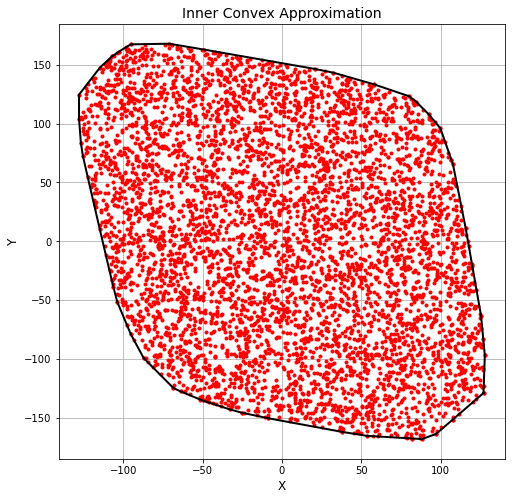

In [1]:
#import các thư viện cần thiết
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.spatial import ConvexHull
np.random.seed(42)

#Khởi tạo 
N_square = 10000

k=16

count = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0


def inner_convex_approximation(X, δ):
#     print("X: ",X)
    #Rotation angle
    alpha = -math.pi/2

    #Rotation Matrix
    R = np.array([[math.cos(alpha), math.sin(alpha)],[-math.sin(alpha), math.cos(alpha)]])
    #công thức (44)
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    
#     print(min_x)
#     print(max_x)
#     print(min_y)
#     print(max_y)
    
    min_X = X[X[:, 0] == min_x]
    max_X = X[X[:, 0] == max_x]
    min_Y = X[X[:, 1] == min_y]
    max_Y = X[X[:, 1] == max_y]
    
#     print(min_X)
#     print(max_X)
#     print(min_Y)
#     print(max_Y)
    
    q12 = np.max(max_X[:, 1])
    q21 = np.min(max_Y[:, 0])
    q32 = np.min(min_X[:, 1])
    q41 = np.max(min_Y[:, 0])
    
#     print(q12)
#     print(q21)
#     print(q32)
#     print(q41)
    
    q1 = (max_x, q12)
    q2 = (q21, max_y)
    q3 = (min_x, q32)
    q4 = (q41, min_y)
    
#     print("q1",q1)
#     print("q2",q2)
#     print("q3",q3)
#     print("q4",q4)
    
    Xcomma = np.array([q1, q2, q3, q4])
    E_test = np.array([[q1, q2], [q2, q3], [q3, q4], [q4, q1]])
    
#     print(E)
        
    Edoubt = E_test[:]
#     print(Edoubt.shape[0])
    
    global count, count1, count2, count3, count4, count5, count6
    while Edoubt.shape[0] > 0:
        count += 1
        print("Lượt chạy thứ: ", count)
        
        print("E_test: ", E_test)
        edoubt = Edoubt[0]
        p, p_plus = edoubt[0], edoubt[1]
        print("edoubt: ",edoubt)
        print("p: ", p)
        print("p_plus: ", p_plus)
        
        dpp_plus = np.dot(R, ((p_plus - p).T)) / np.linalg.norm(p_plus - p)
        
        Xpp_plus = []
        for x in X:
            if np.dot(dpp_plus, x.T) > np.dot(dpp_plus, p.T):
                Xpp_plus.append(x)
        
        Xpp_plus_fix = np.array(Xpp_plus)
        print("Xpp_plus: ", Xpp_plus_fix)

        if Xpp_plus_fix.size != 0:
            
            βpp_plus = np.max(np.dot(dpp_plus, Xpp_plus_fix.T))
            
            print("βpp_plus: ", βpp_plus)
            Bpp_plus = []
            for x in Xpp_plus_fix:
                if np.dot(dpp_plus, x.T) == βpp_plus:
                    Bpp_plus = np.append(Bpp_plus, x)
            
            
            print("Bpp_plus", Bpp_plus)
            
            if βpp_plus - np.dot(dpp_plus, p.T) <= δ:
                count1 += 1
                Edoubt = np.delete(Edoubt, np.where(np.all(Edoubt == edoubt, axis=1))[0], axis=0)
            
            else:
                p_hat = []
                p_hat_calc = Bpp_plus[:]
                x_calc = Bpp_plus[:]
               
                if np.linalg.norm(p_hat_calc - p) == np.max(np.linalg.norm(x_calc - p)):
                        p_hat = np.append(p_hat, p_hat_calc)
                
                
                print("p_hat: ", p_hat)
                print("p: ",p)
                if np.allclose(p_hat, p) and not np.allclose(p_hat, p_plus):
                    count2 += 1
                    print("1")
                    edoubt_index = np.where(np.all(Edoubt == edoubt, axis=(1,2)))[0][0]
                    Edoubt = np.delete(Edoubt, edoubt_index, axis=0)
                elif np.allclose(p_hat, p_plus) and not np.allclose(p_hat, p):
                    count3 += 1
                    print("2")
                    edoubt_index = np.where(np.all(Edoubt == edoubt, axis=(1,2)))[0][0]
                    Edoubt = np.delete(Edoubt, edoubt_index, axis=0)
                elif np.allclose(p_hat, p_plus) and np.allclose(p_hat, p):
                    count6 +=1
                else:
                    count4 += 1
                    dpp_hat = np.dot(R, ((p_hat - p).T)) / np.linalg.norm(p_hat - p)

                    dp_hat_p_plus = np.dot(R, ((p_plus - p_hat).T)) / np.linalg.norm(p_plus - p_hat)

                    dp_hat_p_T = np.dot(R, (((p.T) - p_hat).T)) / np.linalg.norm((p.T) - p_hat)

                    Xpp_hat_find = []
                    for x in Xpp_plus:
                        if np.dot(dpp_hat, x.T) > np.dot(dpp_hat, p.T):
                            Xpp_hat_find.append(x)
                    Xpp_hat = np.array(Xpp_hat_find)

                    Xp_hat_p_plus_find = []
                    for x in Xpp_plus:
                        if np.dot(dp_hat_p_plus, x.T) > np.dot(dp_hat_p_T, p_hat.T):
                            Xp_hat_p_plus_find.append(x)
                    Xp_hat_p_plus = np.array(Xp_hat_p_plus_find)

                    print("Xpp_hat: ", Xpp_hat)
                    print("Xp_hat_p_plus: ", Xp_hat_p_plus)

                    Xcomma = np.vstack((Xcomma, p_hat))
                    print("Xcomma: ", Xcomma)
                    print("kiểu mảng: ", Xcomma.ndim)
                    
                    A = np.array([p, p_hat])
                    B = np.array([p_hat, p_plus])
                    print("A: ", A)
                    print("B: ", B)

                    #Xác định vị trí và xóa cạnh [p, p+] và thêm 2 cạnh [p+, p^] và [p^, p] vào E
                    e_index = np.where(np.all(E_test == edoubt, axis=(1,2)))[0][0]
                    E_test = np.delete(E_test, e_index, axis=0)
                    E_test = np.insert(E_test, e_index, [A, B], axis=0)

                    #Xác định vị trí và xóa cạnh [p, p+] và thêm 2 cạnh [p+, p^] và [p^, p]
                    edoubt_index = np.where(np.all(Edoubt == edoubt, axis=(1,2)))[0][0]
                    Edoubt = np.delete(Edoubt, edoubt_index, axis=0)
                    Edoubt = np.insert(Edoubt, edoubt_index, [A, B], axis=0)



                    print("Edoubt: ", Edoubt)
        
        else:
            count5 += 1
            Edoubt = np.delete(Edoubt, np.where(np.all(Edoubt == edoubt, axis=1))[0], axis=0)
            print("Edoubt: ", Edoubt)
    # Step IV: Return X', E
    Xcomma = np.unique(Xcomma, axis=0)
    hull = ConvexHull(Xcomma)

    # Lấy các cạnh của đa giác lồi
    E = []
    for simplex in hull.simplices:
        E.append(Xcomma[simplex])

    E = np.array(E)
    E_test = np.unique(E_test, axis=0)
    return Xcomma, E
# Test the algorithm with data
p1 = np.array([-130.658, -128])
p2 = np.array([-87.522, -128])
p3 = np.array([48.95, -104.547])
p4 = np.array([97.871, -89.647])
p5 = np.array([124.452, -69.508])
p6 = np.array([143.815, -35.205])
p7 = np.array([168, 62.629])
p8 = np.array([168, 96])
p9 = np.array([127.717, 128])
p10 = np.array([82.477, 128])
p11 = np.array([-61.85, 109.243])
p12 = np.array([-102.638, 98.195])
p13 = np.array([-124.269, 81.396])
p14 = np.array([-140.644, 46.529])
p15 = np.array([-168, -67.84])
p16 = np.array([-168, -99.849])

#List of set of cut points
P = np.array([p1, p2, p3, p4, p5, p6, p7, p8, p9, p10,p11, p12, p13,p14, p15, p16, p1])


#Khởi tạo X

#Rotation angle
alpha = -math.pi/2

#Rotation Matrix
R = np.array([[math.cos(alpha), math.sin(alpha)],[-math.sin(alpha), math.cos(alpha)]])

#Rotate the set of cut points
po = np.dot(P, R)


# Determine min, max of p
#công thức (8)
x_min = np.nanmin(po[:, 0])
x_max = np.nanmax(po[:, 0])
y_min = np.nanmin(po[:, 1])
y_max = np.nanmax(po[:, 1])

xy_min = [x_min, y_min]
xy_max = [x_max , y_max]

# print(x_min)
# print(x_max)
# print(y_min)
# print(y_max)

#Khởi tạo X
X = np.random.uniform(low=xy_min, high=xy_max, size=(N_square, 2))
def outside( points, a, b ):
    res = np.array([])
    nx = b[1] - a[1]
    ny = a[0] - b[0]
    d =  nx * a[0] + ny * a[1]
    l =  nx * points[:,0] + ny* points[:,1]
    res = np.append(res, l-d >= 0)
    return res


#Delete the points outside the polygon to creat a test set
for j in range( k ):
    X = np.delete(X, np.where(outside(X[:], po[j], po[j+1])), 0)
X = X[0:5500]


δ = 0.0

Xcomma, E = inner_convex_approximation(X, δ)

print("Xcomma", Xcomma)
print("E", E)
print("Số đỉnh tập Xcomma: ", Xcomma.shape[0])
print("Số cạnh tập E: ", E.shape[0])

print("Trường hợp 1: ", count1)
print("Trường hợp 2: ", count2)
print("Trường hợp 3: ", count3)
print("Trường hợp 4: ", count6)
print("Trường hợp 5: ", count4)
print("Trường hợp 6: ", count5)
print("Lượt chạy thứ: ", count)

# X_uni = np.unique(Xcomma, axis=0)
# print("Số đỉnh: ", X_uni.shape[0])
# Plotting
# from scipy.spatial import ConvexHull

# Tạo các mảng x và y từ tập P
x = Xcomma[:, 0]
y = Xcomma[:, 1]

# Tìm bao lồi của tập điểm
points = np.column_stack((x, y))
hull = ConvexHull(points)

# Lấy các điểm trên bao lồi
convex_points = points[hull.vertices]

# Thêm điểm đầu tiên vào cuối cùng để tạo thành đa giác hoàn chỉnh
convex_points = np.vstack((convex_points, convex_points[0]))

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(X[:, 0], X[:, 1], 'r.')
ax.plot(Xcomma[:, 0], Xcomma[:, 1], 'r.')
ax.plot(convex_points[:, 0], convex_points[:, 1], 'k-', linewidth=2)
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_title('Inner Convex Approximation', fontsize=14)
plt.grid(True)
plt.show()